In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/shkim/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_path = '/home/shkim/gnn_partitioning/dataset/ISPD98_benchmark_suite/'
file_list = [base_path+f'ibm{bench:02d}/ibm{bench:02d}_coo.pt' for bench in range(1,19)]


In [3]:
fanout_ = []
pin_ = []

for file in file_list:
    hgraph_coo = torch.load(file)
    # coo tensor indice format: [node, hedge]
    x = hgraph_coo._indices()
    hedge_indices = x[1,:]
    cell_indices = x[0,:]
    fanout_list = hedge_indices.unique(return_counts=True)[1].to(torch.float32)
    pin_list = cell_indices.unique(return_counts=True)[1].to(torch.float32)
    fanout_.append(fanout_list)
    pin_.append(pin_list)

In [4]:
for i in range(18):
    print(f'ibm{i+1:02d}')
    print(f'avg_pin: {sum(pin_[i])/len(pin_[i])}')
    print(f'min: {min(pin_[i])}')
    print(f'max: {max(pin_[i])}')

ibm01
avg_pin: 3.965338706970215
min: 1.0
max: 39.0
ibm02
avg_pin: 4.142594814300537
min: 1.0
max: 69.0
ibm03
avg_pin: 4.04447603225708
min: 1.0
max: 100.0
ibm04
avg_pin: 3.8484385013580322
min: 1.0
max: 526.0
ibm05
avg_pin: 4.303949356079102
min: 1.0
max: 9.0
ibm06
avg_pin: 3.9443042278289795
min: 1.0
max: 91.0
ibm07
avg_pin: 3.8243913650512695
min: 1.0
max: 98.0
ibm08
avg_pin: 3.9932565689086914
min: 1.0
max: 1165.0
ibm09
avg_pin: 4.159340858459473
min: 1.0
max: 173.0
ibm10
avg_pin: 4.28591775894165
min: 1.0
max: 137.0
ibm11
avg_pin: 3.979506254196167
min: 1.0
max: 174.0
ibm12
avg_pin: 4.470707416534424
min: 1.0
max: 473.0
ibm13
avg_pin: 4.240846157073975
min: 1.0
max: 180.0
ibm14
avg_pin: 3.70458984375
min: 1.0
max: 270.0
ibm15
avg_pin: 4.430420398712158
min: 1.0
max: 306.0
ibm16
avg_pin: 4.2446370124816895
min: 1.0
max: 177.0
ibm17
avg_pin: 4.63643741607666
min: 1.0
max: 81.0
ibm18
avg_pin: 3.891958236694336
min: 1.0
max: 97.0


In [5]:
for i in range(18):
    print(f'ibm{i+1:02d}')
    print(f'min: {min(fanout_[i])}')
    print(f'max: {max(fanout_[i])}')

ibm01
min: 2.0
max: 42.0
ibm02
min: 2.0
max: 134.0
ibm03
min: 2.0
max: 55.0
ibm04
min: 2.0
max: 46.0
ibm05
min: 2.0
max: 17.0
ibm06
min: 2.0
max: 35.0
ibm07
min: 2.0
max: 25.0
ibm08
min: 2.0
max: 75.0
ibm09
min: 2.0
max: 39.0
ibm10
min: 2.0
max: 41.0
ibm11
min: 2.0
max: 24.0
ibm12
min: 2.0
max: 28.0
ibm13
min: 2.0
max: 24.0
ibm14
min: 2.0
max: 33.0
ibm15
min: 2.0
max: 36.0
ibm16
min: 2.0
max: 40.0
ibm17
min: 2.0
max: 36.0
ibm18
min: 2.0
max: 66.0


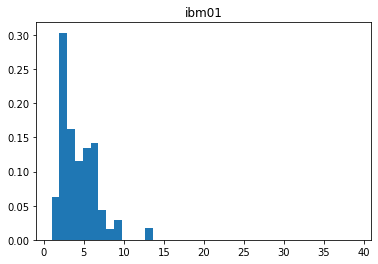

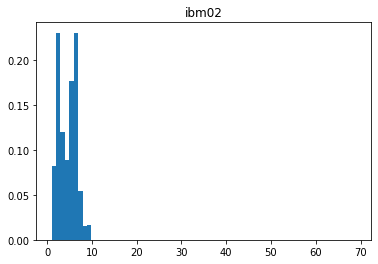

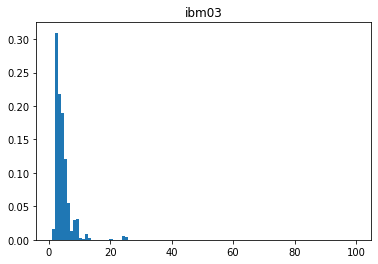

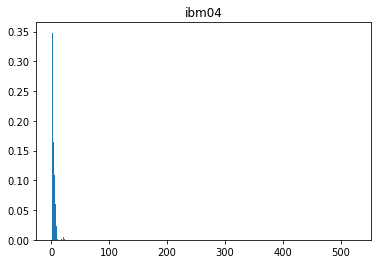

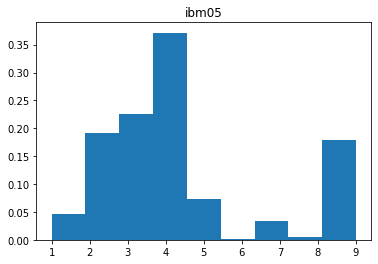

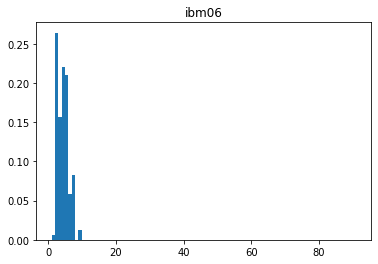

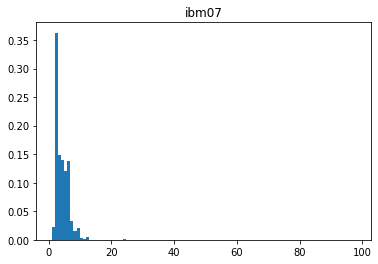

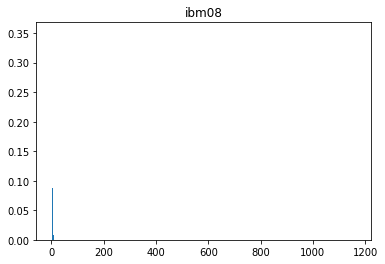

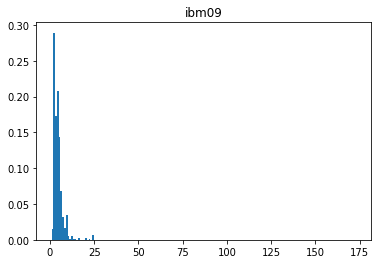

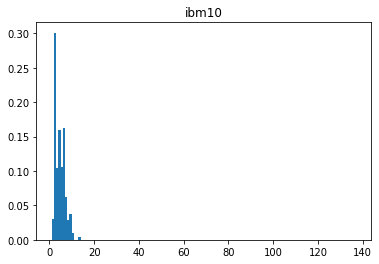

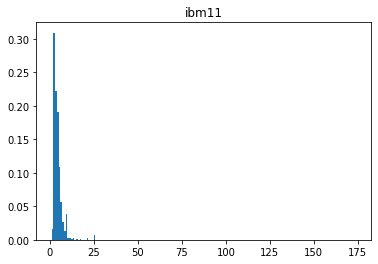

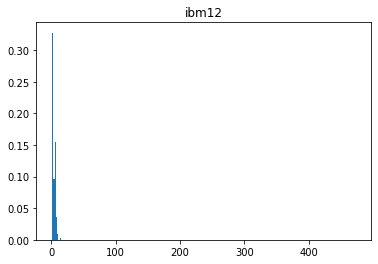

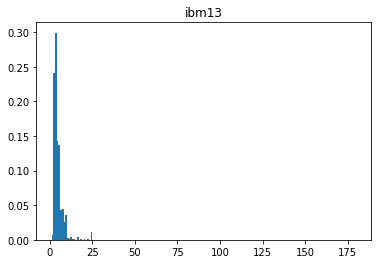

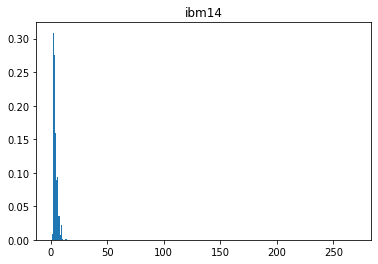

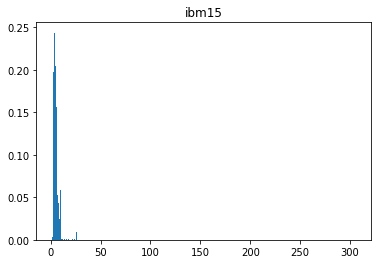

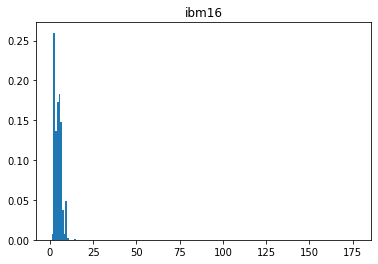

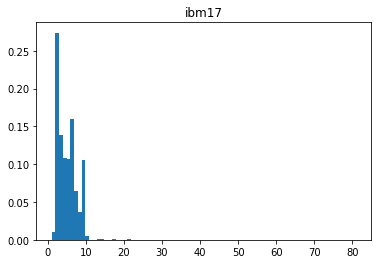

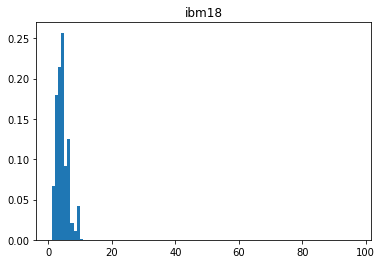

In [6]:
for i in range(18):
    plt.figure()
    plt.hist(pin_[i], density=True, bins=int(max(pin_[i])))
    plt.title(f'ibm{i+1:02d}')

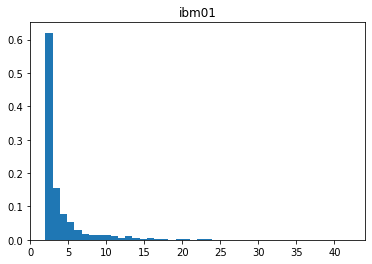

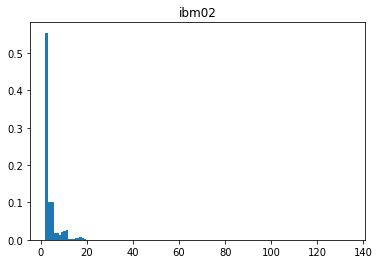

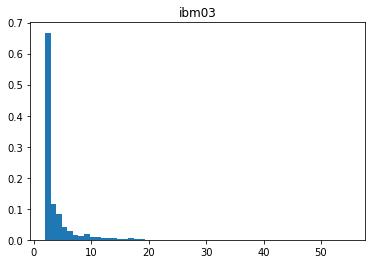

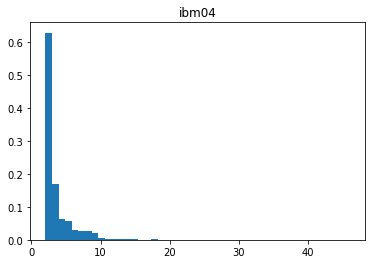

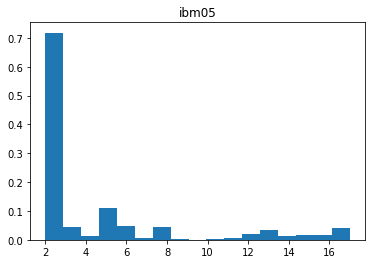

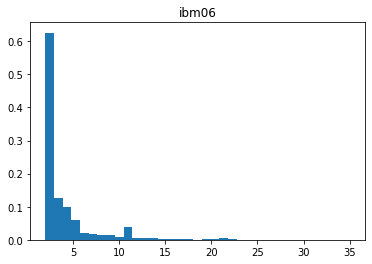

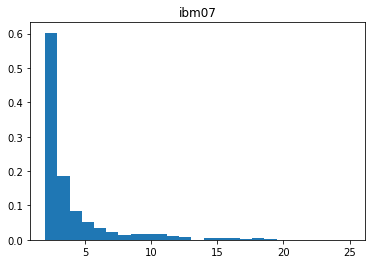

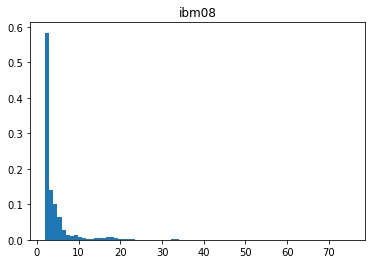

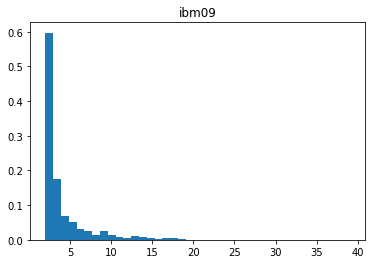

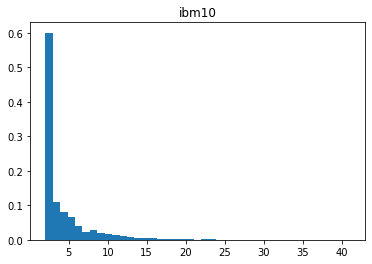

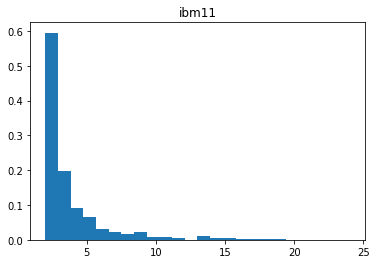

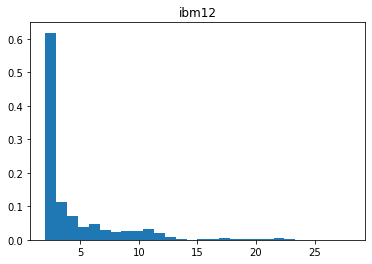

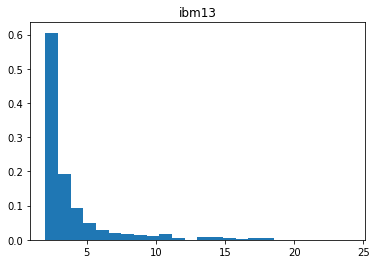

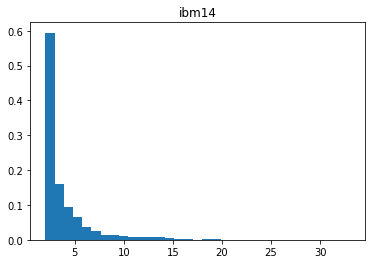

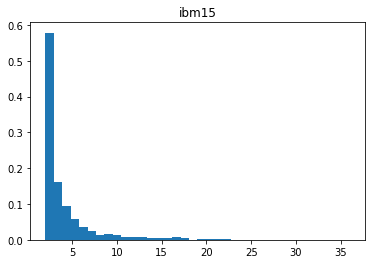

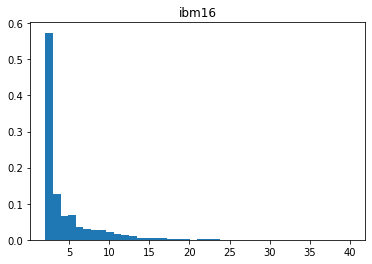

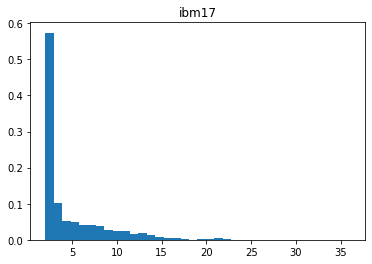

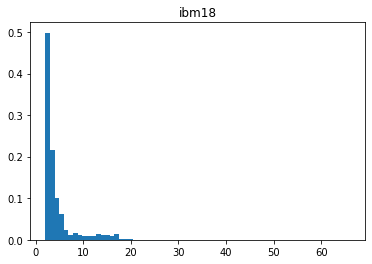

In [7]:
for i in range(18):
    plt.figure()
    plt.hist(fanout_[i], density=True, bins=int(max(fanout_[i])))
    plt.title(f'ibm{i+1:02d}')

In [8]:
import torch
a = torch.Tensor([1,2,3])
x = torch.Tensor(a)
y = torch.Tensor(torch.cat((torch.zeros(1), a[1:])))

print(x+y)

tensor([1., 4., 6.])
